In [1]:
import glob
import os
import random
import shutil
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import torch

current_dir = os.path.dirname(os.path.abspath("__file__"))  # 当前目录
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))  # 上一级目录
sys.path.append(parent_dir)
grandparent_dir = os.path.abspath(os.path.join(parent_dir, ".."))  # 上两级目录
sys.path.append(grandparent_dir)

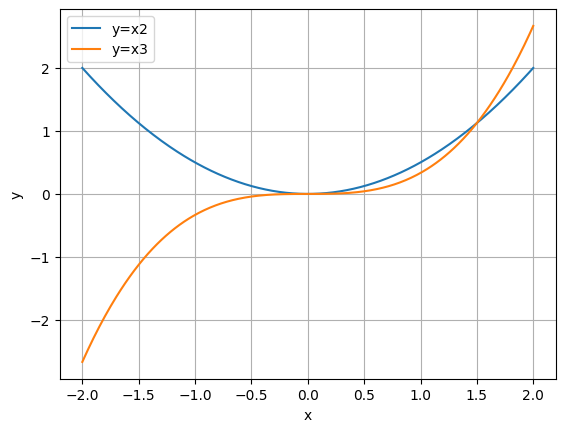

In [2]:
# 生成x值范围
x = np.linspace(-2, 2, 400)
# 计算对应的y值，这里使用numpy的指数函数

# 绘制曲线
# plt.plot(x, np.exp(x), label="y=e^x")
# plt.plot(x, x, label="y=x")
plt.plot(x, 1 / 2 * x**2, label="y=x2")
plt.plot(x, 1 / 3 * x**3, label="y=x3")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

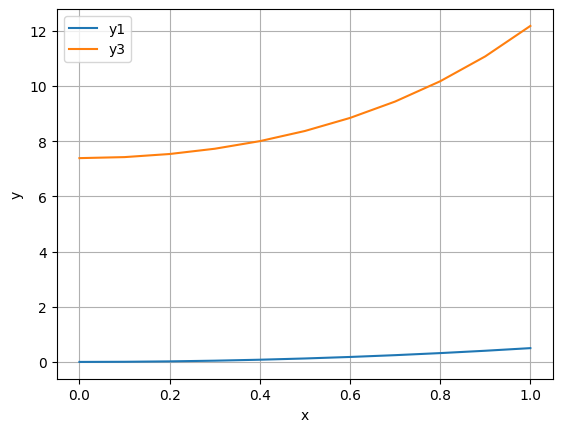

In [18]:
import matplotlib.pyplot as plt
import numpy as np


# 定义RK4方法
def rk4_step(f, x, y, h):
    k1 = f(x, y)
    k2 = f(x + 0.5 * h, y + 0.5 * h * k1)
    k3 = f(x + 0.5 * h, y + 0.5 * h * k2)
    k4 = f(x + h, y + h * k3)
    return y + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)


def f(x, y):
    return x


def f2(x, y):
    return x + 1


# 定义积分函数
def integrate_rk4(f, a, b, y0, h):
    n = int((b - a) / h)
    x_values = np.linspace(a, b, n + 1)
    y_values = np.zeros(n + 1)
    y_values[0] = y0
    for i in range(n):
        y_values[i + 1] = rk4_step(f, x_values[i], y_values[i], h)
    return x_values, y_values


# 设置积分区间和步长
a = 0.0
b = 1.0
h = 0.1
y0 = 0.0

# 使用RK4进行积分
x1, y1 = integrate_rk4(f, a, b, y0, h)
x2, y2 = integrate_rk4(f2, a, b, y0, h)
y3 = 1 * np.exp(2) * np.exp(y1)

# 绘制曲线
plt.plot(x1, y1, label="y1")
plt.plot(x1, y3, label="y3")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()